### Imports

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### Lets import the data, select one random momo review, and see what it is
Each row of the data represents the average review of the momo served by a particular restaurant at a particular location

In [25]:
momo_ratings_df = pd.read_csv("data/momo_ratings.csv")
sample = momo_ratings_df.sample()
sample

,id,restaurant_id,location,momo_rating
12959,12959,12959,Darjeeling,3.85


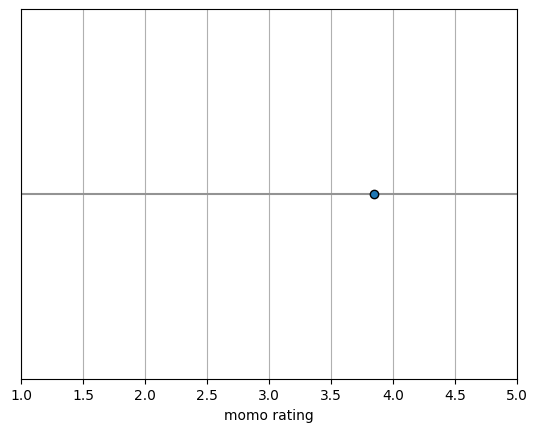

In [40]:
plt.scatter(sample["momo_rating"], [0], edgecolors="black", zorder=3)
plt.yticks([])
plt.axhline(0, color="#939393")
plt.xlim([1, 5])
plt.grid(zorder=0)
plt.xlabel("momo rating")
plt.show()

Now let's do this for all the restaurants, ordered on the basis of location

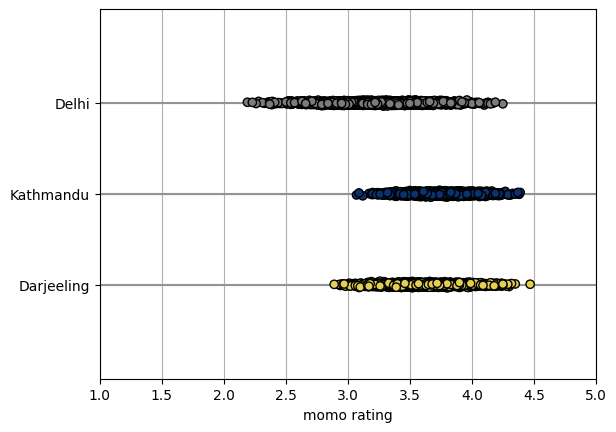

In [42]:
color_normals = []
plot_y = []
for index, row in momo_ratings_df.iterrows():
    if row["location"] == "Kathmandu":
        color_normals.append(0.1)
        plot_y.append(0 + 0.01 * np.random.randn())
    elif row["location"] == "Delhi":
        color_normals.append(0.5)
        plot_y.append(1 + 0.01 * np.random.randn())
    else:
        color_normals.append(0.9)
        plot_y.append(-1 + 0.01 * np.random.randn())

cmap = plt.cm.cividis

plt.scatter(
    momo_ratings_df["momo_rating"],
    plot_y,
    c=cmap(color_normals),
    edgecolors="black",
    zorder=3,
)
plt.yticks(ticks=[-1, 0, 1], labels=["Darjeeling", "Kathmandu", "Delhi"])
for i in range(-1, 2, 1):
    plt.axhline(i, color="#939393")
plt.xlim([1, 5])
plt.ylim([min(plot_y) - 1, max(plot_y) + 1])
plt.grid(zorder=0)
plt.xlabel("momo rating")
plt.show()

Looks interesting. We have 3 locations, and a range of data for those three locations. The variance seems straightforward, but we don't know if the momos served in these three locations are better or worse rated